-  They can be used for classification and regression problems (SVCs and SVRs).
-  They can be applied to linear and non-linear data.
-  The algorithm tries to find the best separating line (or decision boundary) but in a more complex form than the algorithm used in logistic regression.
-  Should lead to a more accurate results in comparison to logistic regression.



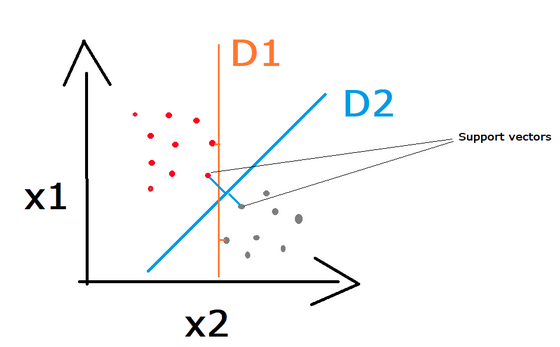

D1 and D2 are both unique decision lines. SVMs tend to maximize the distance between the line and the closest training instances(called support vectors). The best choice is the separation line that leaves the maximum margin from both classes.

SVMs are more powerful than what is being explained here. They can work with non-linear data very efficiently. 

None-linear model might not be easily separated into different classes. Consider the following simple example:

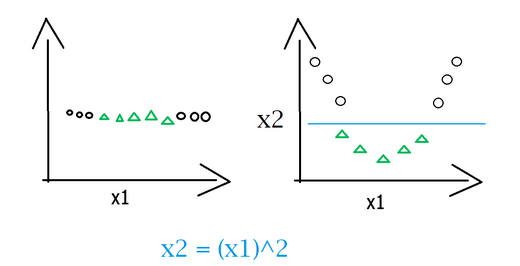

The data becomes more separable when a new feature,x2, was introduced to the plot. x2 is x1 squared. 

This process can be done manually (for simple problems) or automatucally (multiple polynomial features are added) through the "kernal trick". The data is transformed the original input space into a higher dimension space where they become non-linear but easier to be separated. 

__Further helpful resources about the SVMs and the "kernal trick":__
-  https://goo.gl/pYYRYs
-  https://goo.gl/uba8RD



**Kernels:**
(_the most commonly used are highlighted in italic_)
-    Linear.
-    _Polynomial_.
-    _Radial basis function (RBF) - Gaussian RBF_.
-    Sigmoid.
-    etc.



In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target, random_state=0)

svm=SVC()
svm.fit(X_train,y_train)

print (svm.score(X_train,y_train))
print (svm.score(X_test,y_test))

1.0
0.629370629371


100% accuracy on the trained data shows that the model is over-fitting the data, and the accuracy on the test data is low. The scaling of the data could be a possible reason for the low performance of the model. The parameters of the model can also be investigated to obtain better results.

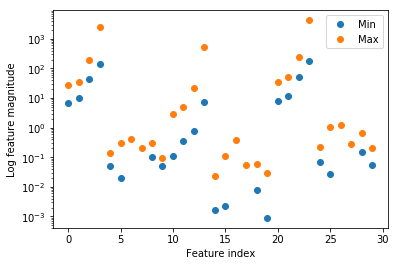

In [6]:
# The min and max of each feature:

import matplotlib. pyplot as plt
%matplotlib inline

plt.plot(X_train.min(axis=0),'o',label='Min')
plt.plot(X_train.max(axis=0),'o',label='Max')
plt.xlabel('Feature index')
plt.ylabel('Log feature magnitude')
plt.yscale('log')
plt.legend(loc='upper right')

There is a difference in scale between the features' min and max values and hence the low performance of the model.


### Data scaling

__Built-in scaling methods in Scikit-learn:__
-  The standard scaler.
-  Min and max scaler.
-  and more...

However, in the following example, the data scaling will be done manually to understand how the process works. We are trying to bring the values of each feature within a certain range.

In [10]:
# The difference between the min and the max is the range of each feature
min_train = X_train.min(axis=0)
max_train = X_train.max(axis=0)
range_train = (max_train - min_train)

# To scale data into 0s and 1s
X_train_scaled = (X_train - min_train) / range_train

min_test = X_test.min(axis=0)
max_test = X_test.max(axis=0)
range_test = (max_test - min_test)

X_test_scaled = (X_test - min_test) / range_test

print(svm.score(X_train_scaled,y_train))
print(svm.score(X_test_scaled,y_test))

0.62676056338
0.629370629371
